In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
from graphufs.stacked_utils import convert_loss_channel2var, get_channel_index
from graphufs.datasets import Dataset
from graphcast.stacked_utils import search_nested_dict

In [2]:
# local variables
_scratch = "/pscratch/sd/n/nagarwal/"
_prototype = "cp1"
_expt = "R2"
_prototypes = "/global/homes/n/nagarwal/graph-ufs/prototypes/"

In [3]:
### Get the right emulator for the above setting: uncomment one of 
### the below lines

from prototypes.cp1.R2.config import CP1Trainer as Emulator 
#from prototypes.atm_only.R0.config import AtmTrainer as Emulator

In [4]:
# open loss dataset
ds = xr.open_dataset(os.path.join(_scratch, _prototype, _expt, "loss.nc"))
ds.load()

<xarray.Dataset> Size: 54MB
Dimensions:                (optim_step: 94880, epoch: 80, channel: 133)
Coordinates:
  * optim_step             (optim_step) int64 759kB 0 1 2 ... 94877 94878 94879
  * epoch                  (epoch) int64 640B 1 2 3 4 5 6 ... 75 76 77 78 79 80
  * channel                (channel) int64 1kB 0 1 2 3 4 ... 128 129 130 131 132
Data variables:
    loss                   (optim_step) float32 380kB 2.031 2.039 ... 0.2019
    loss_by_channel        (optim_step, channel) float32 50MB 0.007968 ... 0....
    loss_by_channel_valid  (epoch, channel) float32 43kB 0.003004 ... 0.003901
    loss_avg               (epoch) float32 320B 0.8032 0.492 ... 0.2048 0.2047
    loss_valid             (epoch) float32 320B 0.5822 0.4658 ... 0.2532 0.2455
    mgrad                  (epoch) float32 320B 8.956e-05 ... 4.198e-05
    g_norm                 (optim_step) float64 759kB nan nan nan ... nan nan
    learning_rate          (optim_step) float32 380kB 0.0 1e-06 ... 0.0 0.0
    epoch_label            (optim_step) float64 759kB 1.0 1.0 1.0 ... 80.0 80.0
Attributes:
    batch_size:  32

In [4]:
# Awry channels
channels = ds.loss_by_channel_valid.where(ds.loss_by_channel_valid>1, drop=True).coords
channels

Coordinates:
  * epoch    (epoch) int64 0B 
  * channel  (channel) int64 0B 

In [5]:
# get meta data
em = Emulator()
tds = Dataset(em, mode="training")
xinputs, xtargets, _ = tds.get_xarrays(0)

tmeta_inp = get_channel_index(xinputs)
tmeta_tar = get_channel_index(xtargets)

In [6]:
# covert channel loss to var loss
var_loss = convert_loss_channel2var(Emulator, ds.loss_by_channel)
var_loss

<xarray.Dataset> Size: 51MB
Dimensions:     (optim_step: 94880, level: 16, z_l: 10)
Coordinates:
  * optim_step  (optim_step) int64 759kB 0 1 2 3 4 ... 94876 94877 94878 94879
  * level       (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * z_l         (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables: (12/22)
    LW          (optim_step) float32 380kB 0.007968 0.008222 ... 0.001054
    SSH         (optim_step) float32 380kB 0.00618 0.006364 ... 0.001018 0.00096
    SW          (optim_step) float32 380kB 0.0243 0.02528 ... 8.076e-05
    dzdt        (level, optim_step) float32 6MB 0.01504 0.01565 ... 0.02611
    icec        (optim_step) float32 380kB 0.00616 0.006712 ... 0.002572
    icetk       (optim_step) float32 380kB 0.006689 0.006322 ... 0.002431
    ...          ...
    ugrd        (level, optim_step) float32 6MB 0.01107 0.01121 ... 0.000724
    ugrd10m     (optim_step) float32 380kB 0.009217 0.009485 ... 0.000721
    uo          (z_l, optim_step) float32 4MB 0.01314 0.01282 ... 0.002315
    vgrd        (level, optim_step) float32 6MB 0.01095 0.01151 ... 0.0005858
    vgrd10m     (optim_step) float32 380kB 0.01372 0.01372 ... 0.0006306
    vo          (z_l, optim_step) float32 4MB 0.009879 0.00982 ... 0.002331

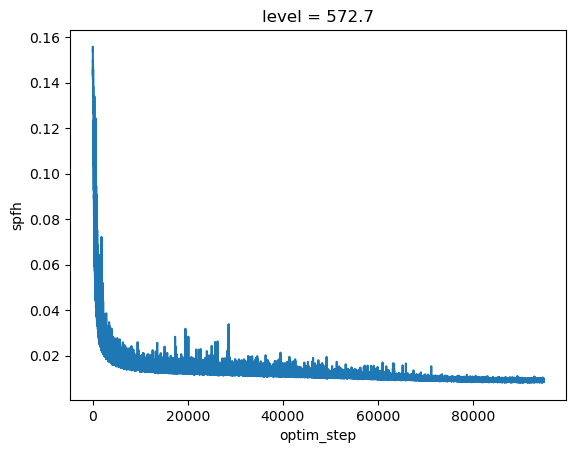

In [7]:
# check for any variable you are interested in
varname = "spfh"
var_loss[varname].isel(level=-1).plot()
plt.show()

In [8]:
# check the training dataset
tds_inp = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "training", "inputs.zarr"))
tds_tar = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "training", "targets.zarr"))

In [15]:
# see the channel corresponding to temp and so in inputs
varname = "so"
ch_list, ch_dict = search_nested_dict(tmeta_inp, "varname", "so")
ch_dict

{61: {'varname': 'so', 'z_l': 0, 'time': 0},
 62: {'varname': 'so', 'z_l': 0, 'time': 1},
 63: {'varname': 'so', 'z_l': 1, 'time': 0},
 64: {'varname': 'so', 'z_l': 1, 'time': 1},
 65: {'varname': 'so', 'z_l': 2, 'time': 0},
 66: {'varname': 'so', 'z_l': 2, 'time': 1},
 67: {'varname': 'so', 'z_l': 3, 'time': 0},
 68: {'varname': 'so', 'z_l': 3, 'time': 1},
 69: {'varname': 'so', 'z_l': 4, 'time': 0},
 70: {'varname': 'so', 'z_l': 4, 'time': 1},
 71: {'varname': 'so', 'z_l': 5, 'time': 0},
 72: {'varname': 'so', 'z_l': 5, 'time': 1},
 73: {'varname': 'so', 'z_l': 6, 'time': 0},
 74: {'varname': 'so', 'z_l': 6, 'time': 1},
 75: {'varname': 'so', 'z_l': 7, 'time': 0},
 76: {'varname': 'so', 'z_l': 7, 'time': 1},
 77: {'varname': 'so', 'z_l': 8, 'time': 0},
 78: {'varname': 'so', 'z_l': 8, 'time': 1},
 79: {'varname': 'so', 'z_l': 9, 'time': 0},
 80: {'varname': 'so', 'z_l': 9, 'time': 1}}

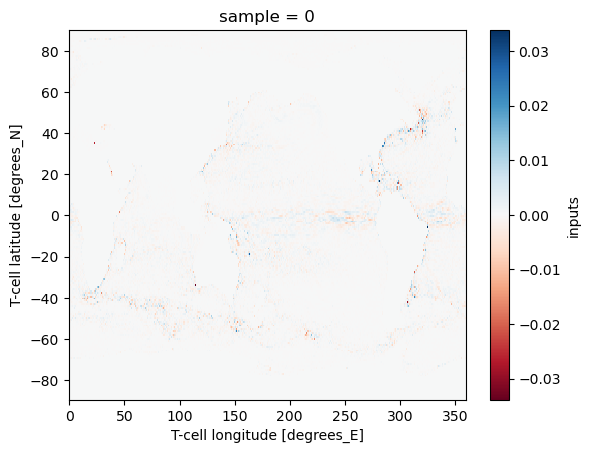

In [16]:
# difference in salinity target minus initial condition
diff = tds_inp.inputs.isel(sample=0, channels=ch_list[-1]) - tds_inp.inputs.isel(sample=0, channels=ch_list[-2])
diff.plot(cmap="RdBu")
plt.show()

In [17]:
# check the statistics for deeper level salinity
statfile = "diffs_stddev_by_level.zarr"
stat = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "normalization", "coupled", statfile))
stat

<xarray.Dataset> Size: 928B
Dimensions:            (level: 16, z_l: 10)
Coordinates:
  * level              (level) float64 128B 226.1 277.8 327.7 ... 922.6 974.3
  * z_l                (z_l) float64 80B 0.5154 2.765 7.648 ... 271.2 417.7
Data variables: (12/27)
    LW                 float32 4B ...
    SSH                float32 4B ...
    SW                 float32 4B ...
    day_progress_cos   float32 4B ...
    day_progress_sin   float32 4B ...
    dswrf_avetoa       float32 4B ...
    ...                 ...
    uo                 (z_l) float64 80B dask.array<chunksize=(1,), meta=np.ndarray>
    vgrd               (level) float32 64B dask.array<chunksize=(16,), meta=np.ndarray>
    vgrd10m            float32 4B ...
    vo                 (z_l) float64 80B dask.array<chunksize=(1,), meta=np.ndarray>
    year_progress_cos  float64 8B ...
    year_progress_sin  float64 8B ...

In [20]:
print("salinity increments std at z_l= ", stat.coords["z_l"][0].values, "is: ", stat.so.isel(z_l=0).values)
print("salinity increments std at z_l= ", stat.coords["z_l"][-1].values, "is: ", stat.so.isel(z_l=-1).values)

salinity increments std at z_l=  0.5154037624597549 is:  0.029495303191473088
salinity increments std at z_l=  417.7042007446289 is:  0.0012261122352867492


In [21]:
# ratio of std
stat.so.isel(z_l=0).values/stat.so.isel(z_l=-1).values

np.float64(24.055956985516143)

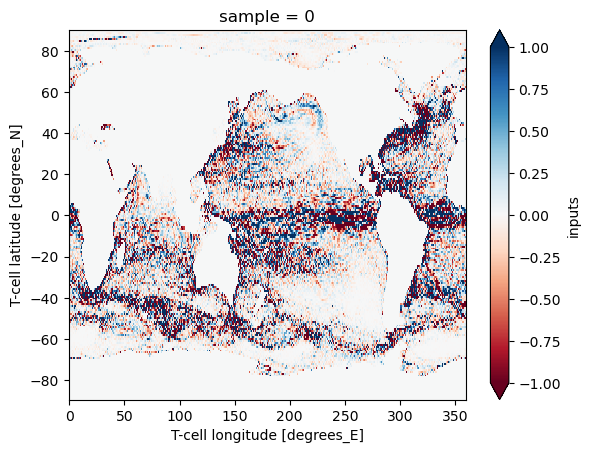

In [23]:
# visualize the normalized data
normalized_diff = diff/stat.so.isel(z_l=-1).values
normalized_diff.plot(cmap="RdBu", vmax=1, vmin=-1)
plt.show()

In [25]:
# compute the maximum of the normalized data
normalized_diff.max().values

array(27.59795035)